In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
NLCD_CLASS_DEFINITIONS = {
    0: ("No Data", "No data value"),
    1: ("Open Water", "Areas of open water, generally with less than 25\% cover of vegetation or soil."),
    2: ("Ice/Snow", "Areas characterized by a perennial cover of ice and/or snow, generally greater than 25\% of total cover."),
    3: ("Developed Open Space", "Areas with a mixture of some constructed materials, but mostly vegetation in the form of lawn grasses. Impervious surfaces account for less than 20\% of total cover. These areas most commonly include large-lot single-family housing units, parks, golf courses, and vegetation planted in developed settings for recreation, erosion control, or aesthetic purposes."),
    4: ("Developed Low Intensity", "Areas with a mixture of constructed materials and vegetation. Impervious surfaces account for 20% to 49% percent of total cover. These areas most commonly include single-family housing units."),
    5: ("Developed Medium Intensity", "Areas with a mixture of constructed materials and vegetation. Impervious surfaces account for 50\% to 79\% of the total cover. These areas most commonly include single-family housing units."),
    6: ("Developed High Intensity", "Highly developed areas where people reside or work in high numbers. Examples include apartment complexes, row houses and commercial/industrial. Impervious surfaces account for 80\% to 100\% of the total cover."),
    7: ("Barren Land (Rock/Sand/Clay)", "Areas of bedrock, desert pavement, scarps, talus, slides, volcanic material, glacial debris, sand dunes, strip mines, gravel pits and other accumulations of earthen material. Generally, vegetation accounts for less than 15\% of total cover."),
    8: ("Deciduous Forest", "Areas dominated by trees generally greater than 5 meters tall, and greater than 20\% of total vegetation cover. More than 75\% of the tree species shed foliage simultaneously in response to seasonal change."),
    9: ("Evergreen Forest", "Areas dominated by trees generally greater than 5 meters tall, and greater than 20\% of total vegetation cover. More than 75\% of the tree species maintain their leaves all year. Canopy is never without green foliage."),
    10: ("Mixed Forest", "Areas dominated by trees generally greater than 5 meters tall, and greater than 20\% of total vegetation cover. Neither deciduous nor evergreen species are greater than 75\% of total tree cover."),
    11: ("Shrub/Scrub", "Areas dominated by shrubs; less than 5 meters tall with shrub canopy typically greater than 20\% of total vegetation. This class includes true shrubs, young trees in an early successional stage or trees stunted from environmental conditions."),
    12: ("Grassland/Herbaceous", "Areas dominated by gramanoid or herbaceous vegetation, generally greater than 80\% of total vegetation. These areas are not subject to intensive management such as tilling, but can be utilized for grazing."),
    13: ("Pasture/Hay", "Areas of grasses, legumes, or grass-legume mixtures planted for livestock grazing or the production of seed or hay crops, typically on a perennial cycle. Pasture/hay vegetation accounts for greater than 20\% of total vegetation."),
    14: ("Cultivated Crops", "Areas used for the production of annual crops, such as corn, soybeans, vegetables, tobacco, and cotton, and also perennial woody crops such as orchards and vineyards. Crop vegetation accounts for greater than 20\% of total vegetation. This class also includes all land being actively tilled."),
    15: ("Woody Wetlands", "Areas where forest or shrubland vegetation accounts for greater than 20\% of vegetative cover and the soil or substrate is periodically saturated with or covered with water."),
    16: ("Emergent Herbaceous Wetlands", "Areas where perennial herbaceous vegetation accounts for greater than 80\% of vegetative cover and the soil or substrate is periodically saturated with or covered with water.")
}

# Copied from the emebedded color table in the NLCD data files
NLCD_CLASS_COLORS = {
    0:  (0, 0, 0, 0),
    1: (70, 107, 159, 255),
    2: (209, 222, 248, 255),
    3: (222, 197, 197, 255),
    4: (217, 146, 130, 255),
    5: (235, 0, 0, 255),
    6: (171, 0, 0, 255),
    7: (179, 172, 159, 255),
    8: (104, 171, 95, 255),
    9: (28, 95, 44, 255),
    10: (181, 197, 143, 255),
    11: (204, 184, 121, 255),
    12: (223, 223, 194, 255),
    13: (220, 217, 57, 255),
    14: (171, 108, 40, 255),
    15: (184, 217, 235, 255),
    16: (108, 159, 184, 255)
}

In [3]:
ENVIROATLAS_CLASS_DEFINITIONS = {
    0: ("Shrubs (not predicted)", "No data value"),
    10: ("Water", "The water class includes all surface waters: streams, rivers, canals, ponds, reservoirs, lakes, bays, estuaries, and coastal waters. For cases of ephemeral changes in water level and extent such as tidelands and some lakes, the waterline at the time of photo acquisition is used to define the extent of the water feature."),
    20: ("Impervious Surface", "An impervious surface is a landscape feature that prevents or substantially limits rainfall from infiltrating into the soil, including: paved roads, parking lots, driveways, sidewalks, roofs, swimming pools, patios, painted surfaces, wooden structures, and most asphalt and concrete surfaces. Many dirt and gravel roads, and railways, are functionally impervious or semi-impervious and are included in the impervious surface class. Most impervious surfaces are anthropogenic. When trees overhang streets and other impervious surfaces, those pixels are assigned to the Tree class rather than the underlying Impervious class. This assignment reflects the EnviroAtlas emphasis on ecosystem services, and the importance of street trees in urban areas."),
    30: ("Soil and Barren", "The Soil and Barren class includes soil, bare rock, mud, clay and sand. This class includes bare fields, construction sites, quarries, gravel pits, mine lands, golf sand traps, stream and river sand bars, beaches and other bare soil and gravel surfaces. Soil and Barren includes natural areas with widely spaced or no vegetation cover."),
    40: ("Trees and Forest", "The Trees and Forest class includes trees of any kind, from a single individual to continuous canopy forest. If a vegetation object casts a shadow longer than a few meters, it is usually classified as a tree. Large shrubs fall in this class."),
    52: ("Shrubs", "Shrubs are generally shorter than trees and bear multiple woody stems. Shrubs are typically recognized in air photos by context (e.g., landscaping vegetation), the mottled texture of the canopy, and short shadows.  In the arid west, small woody vegetation occurring within a soil matrix are classified as shrubs.  In the humid, temperate eastern U.S., shrubs are typically not broken out as a separate class in the EnviroAtlas unless high quality LiDAR is available. If Shrubs are broken out in the classification, it is by height: <= 2m. Otherwise, shrubs typically are assigned to Tree class."),
    70: ("Grass and Herbaceous", "The Grass and Herbaceous class includes the gramminoids, forbs and herbs lacking persistent woody stems. Grass includes residential lawns, golf courses, roadway medians and verges, park lands, transmission line, natural gas corridors, recently clear cut areas, pasture, grasslands, prairie grass, and emergent wetlands vegetation. Small shrubs fall into this category."),
    80: ("Agriculture", "The Agriculture class includes herbaceous vegetation planted or being managed for the production of food, feed, or fiber. Agriculture includes cultivated row crops and fallow fields that are being actively tilled. Agriculture is typically a relatively rare class in urban areas, but may occur with greater frequency in exurban regions away from the urban core. The US Census Urban Areas can be large in aerial extent, and may encompass significant amounts of agricultural land. The Atlas treats agricultural lands primarily in a land cover sense as Grass-Herbaceous, Trees, Shrubs or Soil, and secondarily as Agriculture land use."),
    82: ("Orchards", "Orchards are trees planted or maintained for the production of fruits and timber."),
    91: ("Woody Wetlands", "Woody Wetlands are wetlands dominated by Tree and Forest species. Typically these are identified using ancillary GIS layers (e.g., National Wetlands Inventory)."),
    92: ("Emergent Wetlands", "Emergent Wetlands are wetlands dominated by Grass and Herbaceous species. Typically these are identified using ancillary GIS layers (e.g., National Wetlands Inventory).")
}

ENVIROATLAS_CLASS_COLORS = {
    0: (0, 0, 0, 255), #
    10: (0, 197, 255, 255), # from CC Water
    20: (156, 156, 156, 255), # from CC Impervious
    30: (255, 170, 0, 255), # from CC Barren
    40: (38, 115, 0, 255), # from CC Tree Canopy
    52: (76, 230, 0, 255), # from CC Shrubland
    70: (163, 255, 115, 255), # from CC Low Vegetation
    80: (220, 217, 57, 255), # from NLCD Pasture/Hay color
    82: (171, 108, 40, 255), # from NLCD Cultivated Crops
    91: (184, 217, 235, 255), # from NLCD Woody Wetlands
    92: (108, 159, 184, 255) # from NLCD Emergent Herbaceous Wetlands
}

In [4]:
def make_legend_figure(class_color_dict, class_name_dict, classes_to_show=None):
    
    if classes_to_show is None:
        classes = class_color_dict.keys()
    else:
        classes = classes_to_show

    class_names = [
        class_name_dict[class_name][0]
        for class_name in classes
    ]
    patches = [
        matplotlib.patches.Patch(facecolor=np.array(class_color_dict[class_name])/255.0, edgecolor='k', linewidth=0.1)
        for class_name in classes
    ]
    
    
    fig = plt.figure(figsize=(1,1), dpi=150)
    ax = fig.add_axes([0, 0, 1, 1], frameon=False)
    ax.axis("off")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.legend(patches, class_names, loc='upper left', fontsize=17, frameon=False)
    plt.show()
    plt.close()

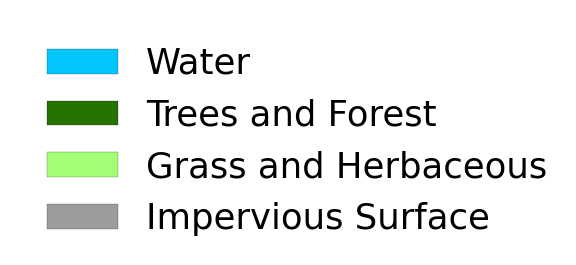

In [5]:
enviroatlas_classes_to_show = [10, 40, 70, 20]
make_legend_figure(ENVIROATLAS_CLASS_COLORS, ENVIROATLAS_CLASS_DEFINITIONS, enviroatlas_classes_to_show)

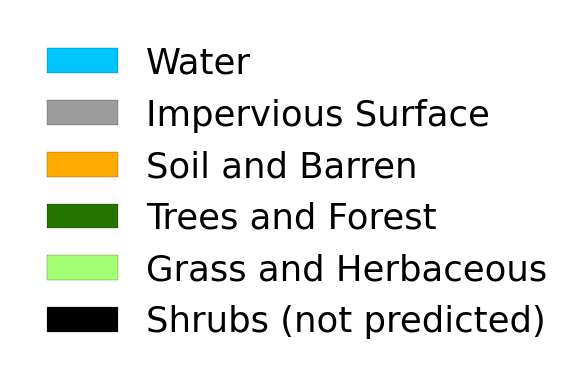

In [6]:
enviroatlas_classes_to_show = [10, 20, 30, 40, 70, 0]
make_legend_figure(ENVIROATLAS_CLASS_COLORS, ENVIROATLAS_CLASS_DEFINITIONS, enviroatlas_classes_to_show)

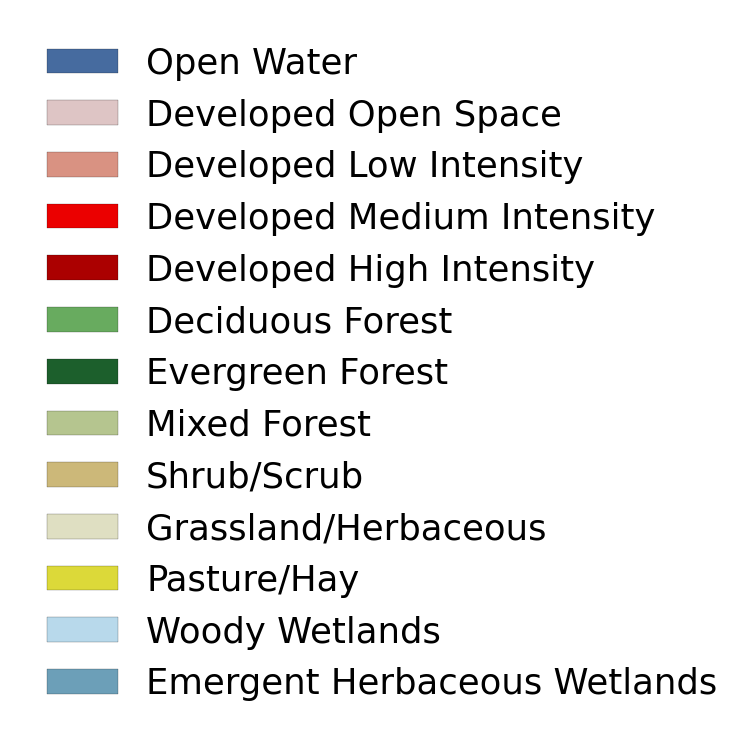

In [38]:
uniques = [
    [1, 3, 4, 5, 6],
    [3,  4,  5,  6,  8,  9, 10, 13],
    [1,  3,  4,  5,  6,  8,  9, 12, 15, 16],
    [3,  4,  5, 11]
]
nlcd_classes_to_show = sorted(list(set([class_idx for unique in uniques for class_idx in unique])))


make_legend_figure(NLCD_CLASS_COLORS, NLCD_CLASS_DEFINITIONS, nlcd_classes_to_show)